In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_data.csv')
df

,pitch_type,zone,stand,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,at_bat_number,pitch_number,bat_score,fld_score,years_since_2015
0,1,11.0,1,1,0,0,0,0,0,0,1,4,1,0,0,0.000000
1,1,8.0,1,1,0,1,0,0,0,0,1,4,2,0,0,0.000000
2,4,13.0,1,2,0,2,0,0,0,0,1,4,3,0,0,0.000000
3,1,3.0,1,1,0,0,0,0,0,1,1,5,1,0,0,0.000000
4,2,14.0,1,0,0,1,0,0,0,1,1,5,2,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18575,2,8.0,0,1,0,0,0,0,1,2,4,31,1,0,5,8.054757
18576,3,5.0,0,1,0,1,0,0,1,2,4,31,2,0,5,8.054757
18577,2,6.0,0,1,0,2,0,0,1,2,4,31,3,0,5,8.054757
18578,1,11.0,0,0,0,2,0,0,1,2,4,31,4,0,5,8.054757


In [16]:
df_encoded = pd.get_dummies(df, columns=['pitch_type'])

In [17]:
df_encoded

,zone,stand,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,at_bat_number,pitch_number,bat_score,fld_score,years_since_2015,pitch_type_1,pitch_type_2,pitch_type_3,pitch_type_4,pitch_type_5
0,11.0,1,1,0,0,0,0,0,0,1,4,1,0,0,0.000000,1,0,0,0,0
1,8.0,1,1,0,1,0,0,0,0,1,4,2,0,0,0.000000,1,0,0,0,0
2,13.0,1,2,0,2,0,0,0,0,1,4,3,0,0,0.000000,0,0,0,1,0
3,3.0,1,1,0,0,0,0,0,1,1,5,1,0,0,0.000000,1,0,0,0,0
4,14.0,1,0,0,1,0,0,0,1,1,5,2,0,0,0.000000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18575,8.0,0,1,0,0,0,0,1,2,4,31,1,0,5,8.054757,0,1,0,0,0
18576,5.0,0,1,0,1,0,0,1,2,4,31,2,0,5,8.054757,0,0,1,0,0
18577,6.0,0,1,0,2,0,0,1,2,4,31,3,0,5,8.054757,0,1,0,0,0
18578,11.0,0,0,0,2,0,0,1,2,4,31,4,0,5,8.054757,1,0,0,0,0


In [18]:
corr = df_encoded.corr()
corr

,zone,stand,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,inning,at_bat_number,pitch_number,bat_score,fld_score,years_since_2015,pitch_type_1,pitch_type_2,pitch_type_3,pitch_type_4,pitch_type_5
zone,1.000000,0.059913,-0.477978,-0.036543,0.094169,0.009998,0.003390,-0.014612,0.028246,0.023769,0.025480,0.034744,0.006915,0.023628,0.047031,-0.212517,0.208597,0.060710,-0.055561,0.041418
stand,0.059913,1.000000,0.021865,-0.044722,-0.002727,0.001309,-0.012327,0.024932,-0.021953,0.024457,0.027110,-0.026176,0.045358,0.026133,0.016935,0.040852,0.077879,-0.119498,0.002463,-0.058313
type,-0.477978,0.021865,1.000000,0.115867,0.059929,-0.005283,0.004556,0.007037,-0.007828,0.015621,0.016517,0.108044,-0.005814,0.000519,-0.014663,-0.017545,-0.000089,-0.003050,0.027548,0.007116
balls,-0.036543,-0.044722,0.115867,1.000000,0.374032,0.022105,0.034176,-0.037262,0.003459,0.006326,0.007533,0.795499,0.017284,0.018627,-0.012625,-0.036795,0.042076,0.065917,-0.009754,-0.075627
strikes,0.094169,-0.002727,0.059929,0.374032,1.000000,-0.001340,0.014390,-0.039693,-0.008837,-0.030827,-0.033326,0.795416,-0.010073,-0.016672,0.005971,-0.042539,0.059171,0.056595,-0.035833,-0.051792
on_3b,0.009998,0.001309,-0.005283,0.022105,-0.001340,1.000000,0.169234,0.183699,0.139166,-0.038264,-0.002364,0.017596,0.081761,-0.038425,-0.009086,-0.018435,0.030237,0.000820,-0.001587,-0.014950
on_2b,0.003390,-0.012327,0.004556,0.034176,0.014390,0.169234,1.000000,0.158523,0.150675,-0.003703,0.034608,0.036352,0.076070,-0.035584,-0.003810,-0.018945,0.026136,0.013452,-0.017490,-0.005524
on_1b,-0.014612,0.024932,0.007037,-0.037262,-0.039693,0.183699,0.158523,1.000000,0.142343,-0.011778,0.032121,-0.039459,0.036112,-0.015303,-0.067299,-0.015231,0.007395,0.000839,0.044097,-0.034032
outs_when_up,0.028246,-0.021953,-0.007828,0.003459,-0.008837,0.139166,0.150675,0.142343,1.000000,0.020677,0.081702,-0.007574,0.084619,0.006196,0.001809,-0.025149,0.028172,0.016401,-0.025199,0.007956
inning,0.023769,0.024457,0.015621,0.006326,-0.030827,-0.038264,-0.003703,-0.011778,0.020677,1.000000,0.970818,-0.015069,0.258915,0.457449,-0.012965,-0.116504,0.051277,0.069392,0.008282,0.038983


In [19]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [Fa

<Axes: >

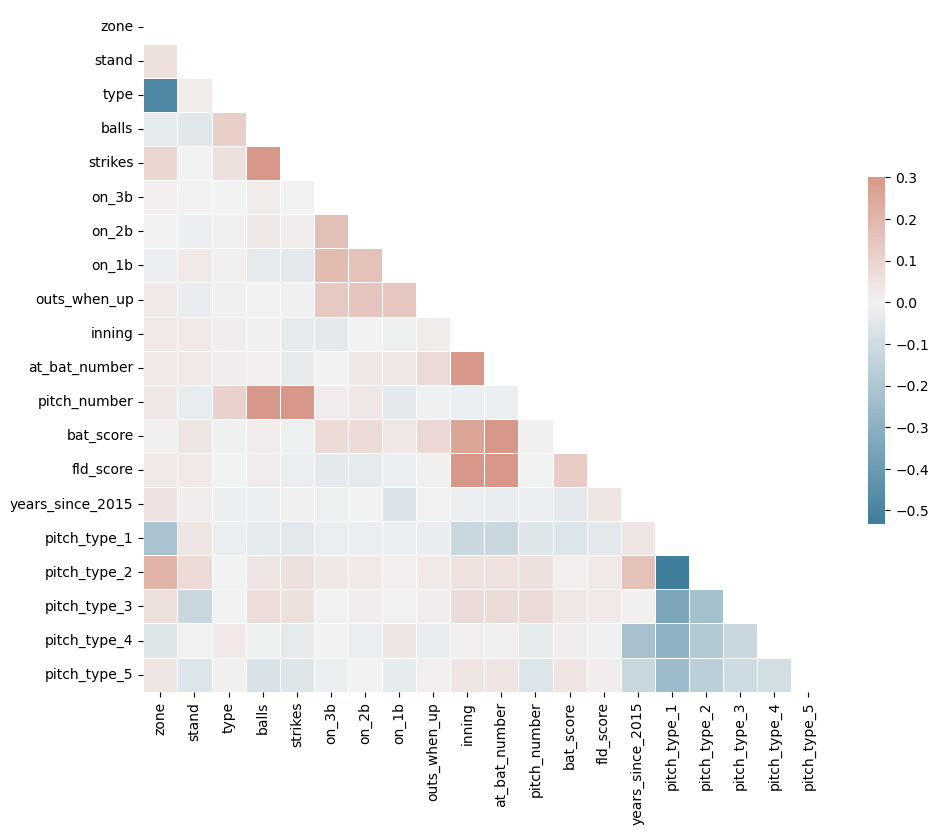

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})